<a href="https://colab.research.google.com/github/devbhojwani/devdatascience/blob/master/FeatureSelectionCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Selection


### The data:
- The dataset is available here: http://lib.stat.cmu.edu/datasets/bodyfat 
- Test subjects 

In [0]:
### import the data and show it (I've gotta move that up here)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from google.colab import files 
uploaded = files.upload()

Saving Large.Bodyfat.csv to Large.Bodyfat.csv


In [0]:
data = pd.read_csv('Large.Bodyfat.csv')

The case column is kind of useless, so we're going to remove it

In [0]:
data.drop(['case'],axis=1,inplace=True)
data.head()

,percent fat,age,weight (lbs),height (inches),neck circum (cm),chest circum (cm),abdomen circum (cm),hip circum (cm),thigh circum (cm),knee circum (cm),ankle circum (cm),biceps circum (cm),forearm circum (cm),wrist circum (cm)
0,12.6,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.9,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,24.6,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.9,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,27.8,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


**Our goal**: Predict a person's body fat percentage using the other measurements
  - We have 13 predictors that can be used to determine this
  - Below is each predictor plotted against a person's body fat percentage

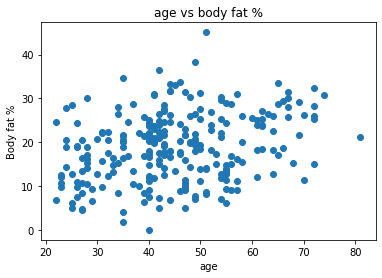

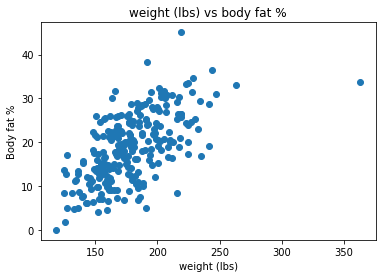

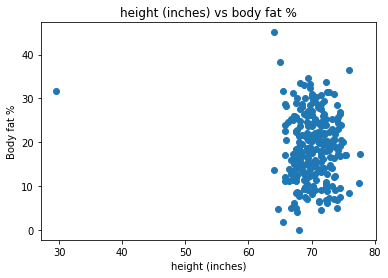

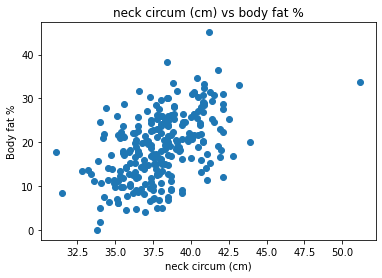

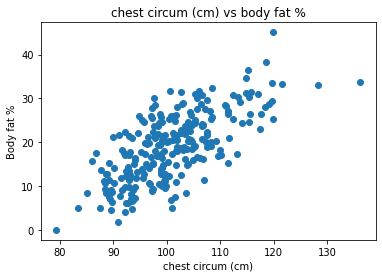

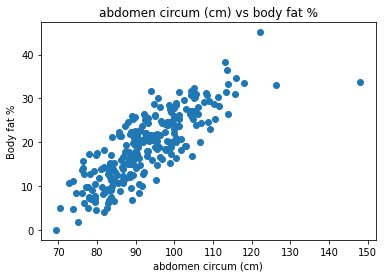

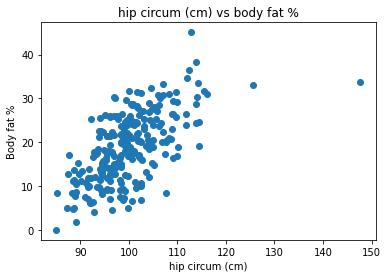

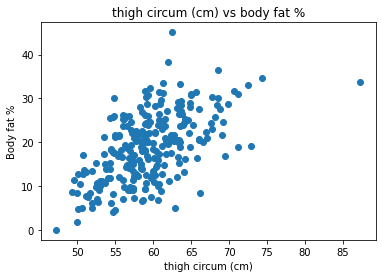

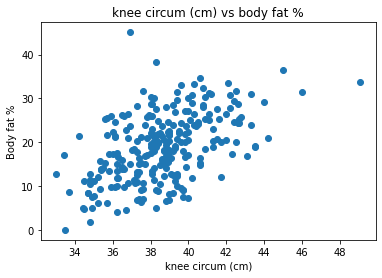

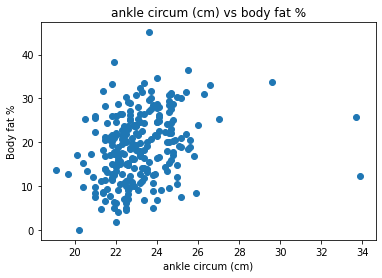

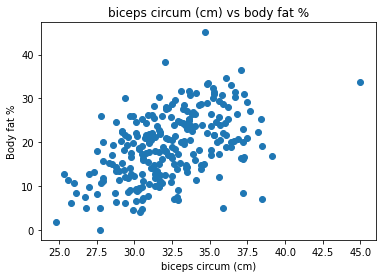

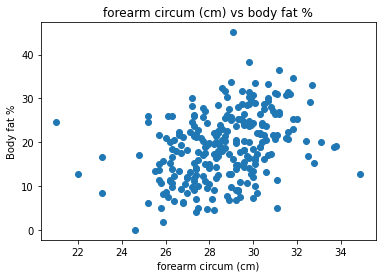

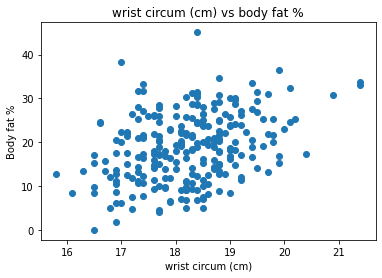

In [0]:
### I'm going to plot the data here
for item in data:
  if item != "percent fat":
    plt.scatter(data[item],data["percent fat"])
    plt.title(item + " vs body fat %")
    plt.ylabel("Body fat %")
    plt.xlabel(item)
    plt.show()

## Linear regression
- Below is a linear regression using a 70/30 train-test split


In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## I reshaped y to put all of the values on the same scale
Xs = data.drop(['percent fat'], axis = 1)
y = data['percent fat'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.30, random_state=40)

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

pred_train_lr= lin_reg.predict(X_train)
print("MSE on training: ",np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print("R2 on training: ",r2_score(y_train, pred_train_lr))

pred_test_lr= lin_reg.predict(X_test)
print("MSE on testing: ", np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print("R2 on testing: ", r2_score(y_test, pred_test_lr))

MSE on training:  3.8331239773898433
R2 on training:  0.7575839155547656
MSE on testing:  4.15390580258503
R2 on testing:  0.7004342473058764


As we can see, our linear regression yields an R^2 value of 0.7 on our testing data. This isn't that bad. However, the model performs better when run on the training data (as expected). This indicates that the model reduces bias in exchange for worse accuracy

## Ridge Regression
- A ridge regression will be used to see if it fits the data better than the linear regression. It should perform no worse on the testing data than the linear regression model
- We will use the ridge regression to take a look at what features have been deemed "most important"

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, RidgeCV

ridge = Ridge()

### Here, I'm plugging in different values for lambda and choosing the one that models things best
parameters = {'alpha': [10 ** a for a in range(-6, 6)]}

ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(Xs,y)

print("Best alpha value: ", ridge_regressor.best_params_['alpha'])

## Now, I'm creating a ridge regression using the calculated alpha, and running it on our data
model_ridge = Ridge(alpha=10)
model_ridge.fit(X_train, y_train) 

pred_train_ridge= model_ridge.predict(X_train)
print("MSE on training: ", np.sqrt(mean_squared_error(y_train,pred_train_ridge))) 
print("R2 on training: ", r2_score(y_train, pred_train_ridge))

pred_test_ridge= model_ridge.predict(X_test)
print("MSE on testing: ", np.sqrt(mean_squared_error(y_test,pred_test_ridge))) 
print("R2 on testing: ", r2_score(y_test, pred_test_ridge))


Best alpha value:  10
MSE on training:  3.8368124000723522
R2 on training:  0.7571171614506036
MSE on testing:  4.1200216309899105
R2 on testing:  0.7053015398980145


As we can see, the ridge regression models the testing data slightly better than the linear regression, and modelse the training data slightly worse. We'll take a look at the features it deemed "most important."

In [0]:
##These are the coefficients given to each feature using the ridge regression model.
#Features with greater absolute coefficients are the "mose stressed" features
# Each index in the array corresponds to the column in the dataset at that index
print("Coefficients given to each predictor: \n", model_ridge.coef_[0], "\n")

sorted_coef = np.argsort(np.abs(model_ridge.coef_[0]))
#np.argsort sorts from least to greatest, so I reverse the array
sorted_coef = np.flip(sorted_coef)

print("Predictors, ordered by absolute coefficient: \n")
for item in sorted_coef:
  print(Xs.columns[item] + ": " ,model_ridge.coef_[0][item])

Coefficients given to each predictor: 
 [ 6.42084693e-02 -1.01110536e-01 -9.11365744e-02 -5.33600853e-01
  1.06019176e-01  8.85603984e-01 -2.96337779e-01  2.99669090e-01
 -9.30722066e-04  2.42344729e-01  2.70640815e-01  3.67192503e-01
 -1.49433301e+00] 

Predictors, ordered by absolute coefficient: 

wrist circum (cm):  -1.4943330103303676
abdomen circum (cm):  0.885603983635176
neck circum (cm):  -0.5336008527557381
forearm circum (cm):  0.3671925030298054
thigh circum (cm):  0.29966908971923434
hip circum (cm):  -0.29633777861087707
biceps circum (cm):  0.2706408148411216
ankle circum (cm):  0.24234472892828257
chest circum (cm):  0.10601917563709784
weight (lbs):  -0.10111053628262698
height (inches):  -0.09113657435032325
age:  0.06420846934252572
knee circum (cm):  -0.0009307220660713712


## Lasso Regression
- Now, we'll run a lasso regression as well
- One of the differences between the lasso and ridge regressions is that the lasso regression allows coefficients to equal 0

In [0]:
from sklearn.linear_model import Lasso, LassoCV

lasso = Lasso()
### Here, I'm plugging in different values for lambda and choosing the one that models things best
parameters = {'alpha': [10 ** a for a in range(-6, 6)]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(Xs,y)

print("Best alpha value: ", lasso_regressor.best_params_['alpha'])

model_lasso = Lasso(alpha=2)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)


pred_train_lasso= model_lasso.predict(X_train)
print("MSE on training: ", np.sqrt(mean_squared_error(y_train,pred_train_lasso))) 
print("R2 on training: ", r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print("MSE on testing: ", np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print("R2 on testing: ", r2_score(y_test, pred_test_lasso))

NameError: ignored

The lasso regression performs slightly, but noticably, better on the testing data than the ridge regression. This increased performance comes at the expense of its performance on the training data. We'll now look at the features the model deemed "most important"

In [0]:
##These are the coefficients given to each feature using the ridge regression model.
#Features with greater absolute coefficients are the "mose stressed" features
# Each index in the array corresponds to the column in the dataset at that index
print("Coefficients given to each predictor: \n", model_lasso.coef_, "\n")

sorted_l = np.argsort(np.abs(model_lasso.coef_))
#np.argsort sorts from least to greatest, so I reverse the array
sorted_l = np.flip(sorted_l)

print("Predictors, ordered by absolute coefficient: \n")
for item in sorted_l:
  print(Xs.columns[item] + ": " ,model_lasso.coef_[item])

Coefficients given to each predictor: 
 [ 0.01729169 -0.09678071 -0.06443753 -0.          0.          0.80039661
 -0.          0.          0.          0.          0.          0.
 -0.        ] 

Predictors, ordered by absolute coefficient: 

abdomen circum (cm):  0.8003966107282533
weight (lbs):  -0.09678070867770426
height (inches):  -0.06443752951101901
age:  0.017291693880203348
wrist circum (cm):  -0.0
forearm circum (cm):  0.0
biceps circum (cm):  0.0
ankle circum (cm):  0.0
knee circum (cm):  0.0
thigh circum (cm):  0.0
hip circum (cm):  -0.0
chest circum (cm):  0.0
neck circum (cm):  -0.0


As we can see, the regression only chooses 4 of the original 13 factors in its model!

# Forward Selection


In [0]:
import pandas as pd
data1= pd.read_csv("Large.Bodyfat.csv")
from sklearn.model_selection import train_test_split
newdata1= data1.iloc[:, 1:]
newdata1

X= newdata1.iloc[:,1:]
y= newdata1.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)


In [0]:
import statsmodels.api as sm
#creates a function for forward selection
def forward_select(X, y, significance_level=0.05):
    initial_features = X.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [0]:
#applies forward selection function the the training data 

forward_select(X_train,y_train)
features = forward_select(X_train, y_train)
features

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


['abdomen circum (cm)',
 'weight (lbs)',
 'wrist circum (cm)',
 'biceps circum (cm)']

In [0]:
import sklearn.linear_model as linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn import metrics
#running a model on training data with the certain predictors 
#then using test data for predictions 

regr = linear_model.LinearRegression()
regr.fit(X_train[features], y_train)
y_pred = regr.predict(X_test[features])
forward_mse=mean_squared_error(y_test, y_pred)
forward_r2=r2_score(y_test, y_pred)
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))




Coefficients: 
 [ 0.96432803 -0.15533174 -1.42560913  0.44649316]
Mean squared error: 15.52
Variance score: 0.73


[link text](https://)# New Section

# Backwards Selection


In [0]:
#defines function for backwards selection 

def backward_elimination(X, y,significance_level = 0.05):
    features = X.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(X[features])
        p_values = sm.OLS(y, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [0]:
#applies function to training data 

backwardsfeatures= backward_elimination(X_train,y_train)
backwardsfeatures



['age',
 'neck circum (cm)',
 'abdomen circum (cm)',
 'hip circum (cm)',
 'thigh circum (cm)',
 'forearm circum (cm)',
 'wrist circum (cm)']

In [0]:
regr = linear_model.LinearRegression()
regr.fit(X_train[backwardsfeatures], y_train)
y_pred = regr.predict(X_test[backwardsfeatures])
forward_mse=mean_squared_error(y_test, y_pred)
forward_r2=r2_score(y_test, y_pred)
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))


Coefficients: 
 [ 0.0905287  -0.62923811  0.87474085 -0.45620328  0.36258746  0.45350132
 -1.91605564]
Mean squared error: 16.09
Variance score: 0.72


### Stepwise Selection


In [0]:

#creates function for stepwise selection 

def stepwise_selection(X, y,SL_in=0.05,SL_out = 0.05):
    initial_features = X.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(X[best_features])
                p_values = sm.OLS(y, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [0]:
#applies stepwise to training data

stepwisefeatures= stepwise_selection(X_train,y_train)
stepwisefeatures

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == '__main__':


['abdomen circum (cm)',
 'weight (lbs)',
 'wrist circum (cm)',
 'biceps circum (cm)']

In [0]:
regr = linear_model.LinearRegression()
regr.fit(X_train[stepwisefeatures], y_train)
y_pred = regr.predict(X_test[stepwisefeatures])
forward_mse=mean_squared_error(y_test, y_pred)
forward_r2=r2_score(y_test, y_pred)
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))


Coefficients: 
 [ 0.96432803 -0.15533174 -1.42560913  0.44649316]
Mean squared error: 15.52
Variance score: 0.73


Model with All Predictors 


In [0]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
forward_mse=mean_squared_error(y_test, y_pred)
forward_r2=r2_score(y_test, y_pred)
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 7.09741354e-02 -9.84032259e-02 -8.22460815e-02 -5.21082878e-01
  1.07465016e-01  8.84120845e-01 -2.97712364e-01  3.02351800e-01
  1.40907754e-03  2.78871636e-01  2.82059082e-01  4.02946874e-01
 -1.81562191e+00]
Mean squared error: 17.25
Variance score: 0.70


## Variance Thresholding






*   Variance Thresholding is a filter feature selection method
*   Deals with eliminating low variance features that most likely will not impact the model



In [0]:
#imports necessry for the feature selection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.feature_selection import VarianceThreshold

In [0]:
#upload file
from google.colab import files 
uploaded = files.upload()

Saving Large.Bodyfat.csv to Large.Bodyfat.csv


In [0]:
data = pd.read_csv('Large.Bodyfat.csv')
data.head()

,case,percent fat,age,weight (lbs),height (inches),neck circum (cm),chest circum (cm),abdomen circum (cm),hip circum (cm),thigh circum (cm),knee circum (cm),ankle circum (cm),biceps circum (cm),forearm circum (cm),wrist circum (cm)
0,1,12.6,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,2,6.9,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,3,24.6,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,4,10.9,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,5,27.8,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [0]:
#Split into test and train data
xtr = data.drop(['case','percent fat'],1).values[:-40]
ytr = data['percent fat'].values[:-40]
xte = data.drop(['case','percent fat'],1).values[-40:]
yte = data['percent fat'].values[-40:]

In [0]:
#create threshold objects
threshold = VarianceThreshold(threshold=.5)
threshold2 = VarianceThreshold(threshold=20)

In [0]:
#transform the training sets
X_low_variance = threshold.fit_transform(xtr)
X_high_variance = threshold2.fit_transform(xtr)
X_high_variance[0:5]

array([[ 23.  , 154.25,  93.1 ,  85.2 ,  94.5 ,  59.  ],
       [ 22.  , 173.25,  93.6 ,  83.  ,  98.7 ,  58.7 ],
       [ 22.  , 154.  ,  95.8 ,  87.9 ,  99.2 ,  59.6 ],
       [ 26.  , 184.75, 101.8 ,  86.4 , 101.2 ,  60.1 ],
       [ 24.  , 184.25,  97.3 , 100.  , 101.9 ,  63.2 ]])

## Gini Coefficients in Random Forest



*   Random Forest deals with comparing Gini impurity values to find the most important features
*   Random Forest itself is a predictive model that also happens to use the Gini Index to find the most impactful features



In [0]:
#import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [0]:
#import the data into the file
data = pd.read_csv("https://web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.data")

In [0]:
#clean and split the data
data["famhist"].replace(["Present","Absent"],[1,0],inplace=True)
X = data.drop(['row.names','chd'],1)
y = data['chd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [0]:
#using random forest with all of the features as a baseline
sel = RandomForestClassifier(n_estimators = 100)
sel.fit(X_train,y_train)
y_pred=sel.predict(X_test)

In [0]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7050359712230215


In [0]:
#Using select from model to analyze the most important features from Random Forest
#Measured by Mean Impurity Decrease (MDI) -> This is the Gini impurity
clf = SelectFromModel(RandomForestClassifier(n_estimators = 100))
clf.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,

In [0]:
#Finding which features have above average importance in terms of decrease the Gini impurity
#across all trees
clf.get_support()

array([False,  True,  True,  True, False, False, False, False,  True])

In [0]:
#Finding the number of names of the important features
selected_feat= X_train.columns[(clf.get_support())]
len(selected_feat)

4

In [0]:
print(selected_feat)

Index(['tobacco', 'ldl', 'adiposity', 'age'], dtype='object')


In [0]:
#Changing and resplitting the data set to only contain the important features
data = pd.read_csv("https://web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.data")
nX = data[['tobacco', 'ldl', 'adiposity', 'age']]
ny = data['chd']
nX_train, nX_test, ny_train, ny_test = train_test_split(nX, ny, test_size=0.1)

In [0]:
#Retraining the model with only these four features
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(nX_train,ny_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
#Finding the accuracy of this new model
pred=rfc.predict(nX_test)
print("Accuracy:",metrics.accuracy_score(ny_test, pred))

Accuracy: 0.8297872340425532
